In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


In [2]:
df=pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv')

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df['Diabetes_012'].unique()

array([0., 2., 1.])

**EDA**

In [6]:
print("Row of this dataset is:",df.shape[0],"and Columns or features of this dataset is:",df.shape[1])

Row of this dataset is: 253680 and Columns or features of this dataset is: 22


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
d=df.duplicated().sum()
d

23899

In [9]:
print(df.shape[0]-d)

229781


In [10]:
new_df=df.drop_duplicates()

In [11]:
new_df.shape

(229781, 22)

In [12]:
new_df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.325627,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,0.794813,0.060710,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.724623,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,0.403839,0.238798,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [13]:
#importing required ploting library
import matplotlib.pyplot as plt
import seaborn as sns 

<Axes: xlabel='Diabetes_012', ylabel='Education'>

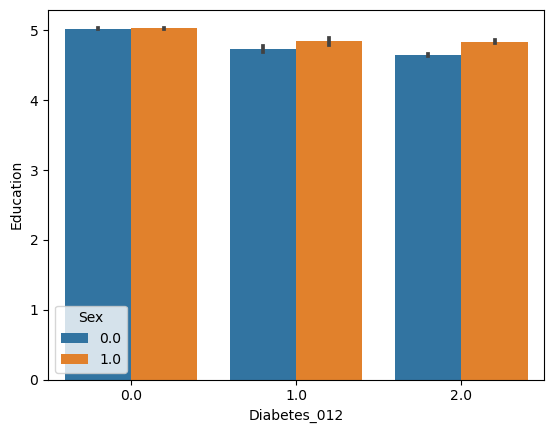

In [14]:
sns.barplot(x=new_df['Diabetes_012'],y=new_df['Education'],hue=new_df['Sex'])

<Axes: xlabel='Diabetes_012', ylabel='Sex'>

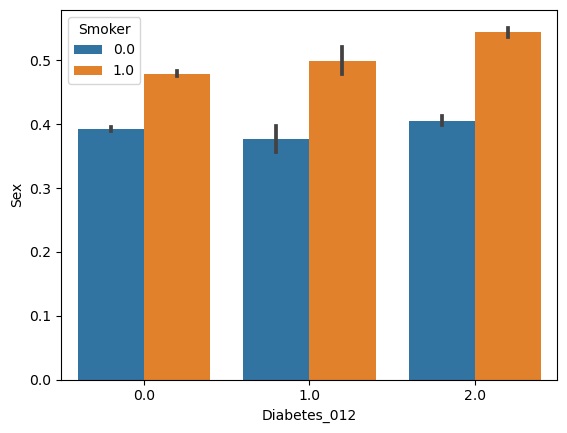

In [15]:
sns.barplot(x=new_df['Diabetes_012'],y=new_df['Sex'],hue=new_df['Smoker'])

<Axes: >

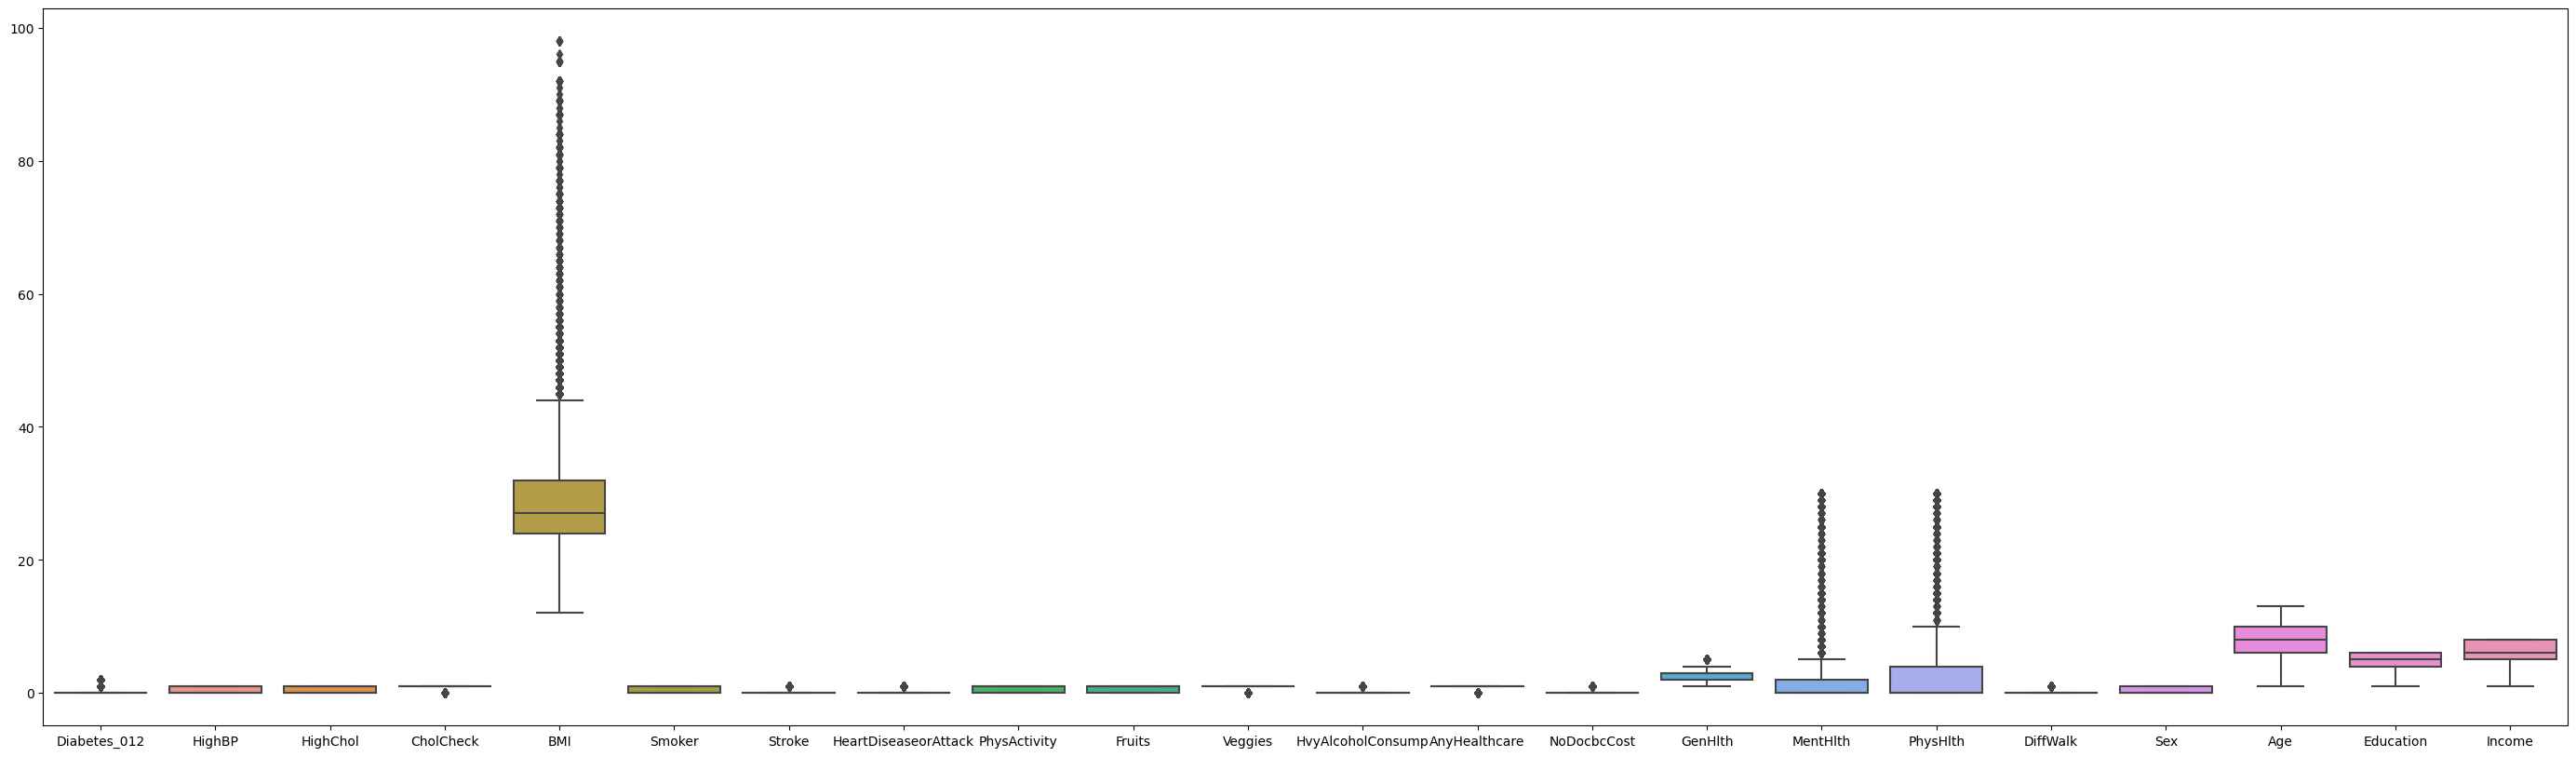

In [16]:
plt.figure(figsize=(35,10))
sns.boxplot(new_df)

<Axes: ylabel='Density'>

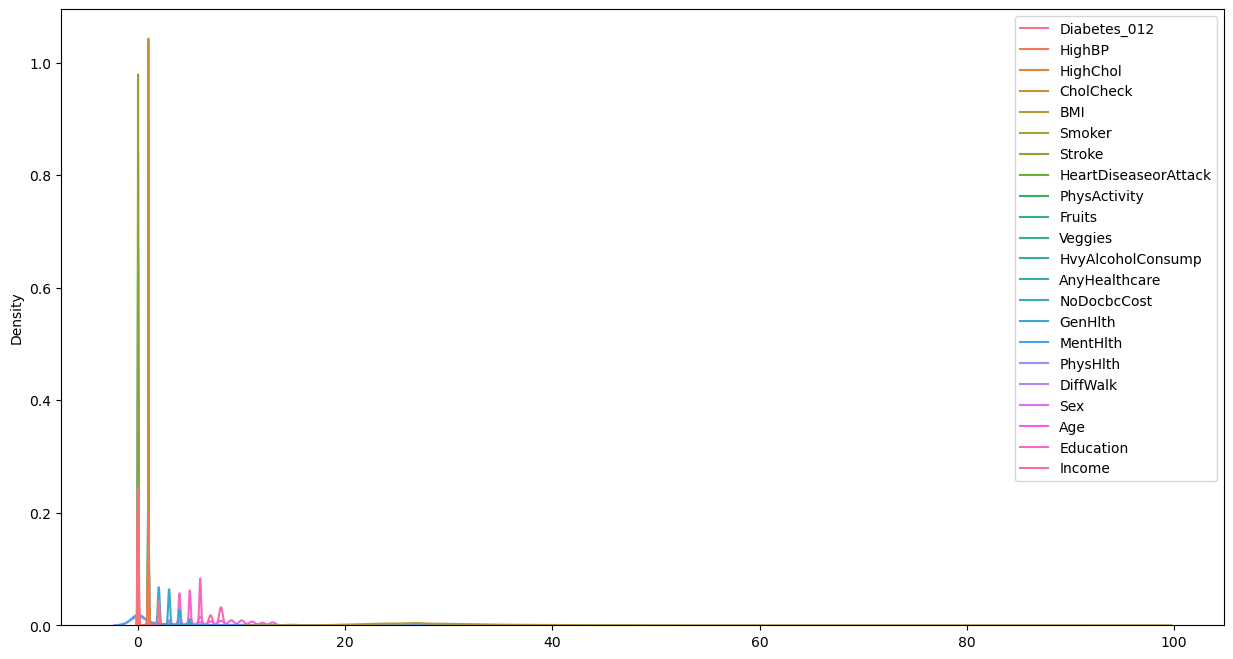

In [17]:
plt.figure(figsize=(15,8))
sns.kdeplot(new_df)

/tmp/ipykernel_20/167284514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Stroke'])


<Axes: xlabel='Stroke', ylabel='Density'>

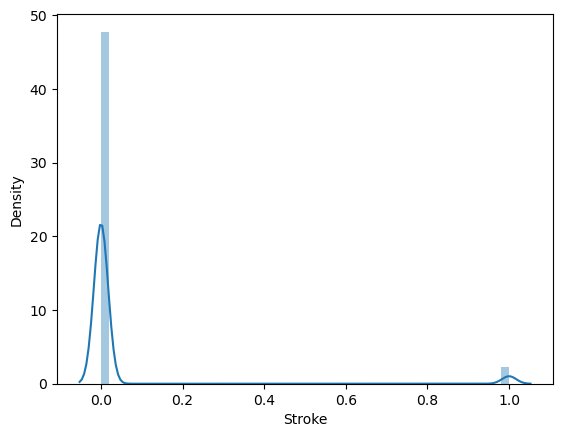

In [18]:
sns.distplot(new_df['Stroke'])

In [19]:
X=new_df.drop(columns='Diabetes_012')
y=new_df['Diabetes_012']

In [20]:
X.shape

(229781, 21)

In [21]:
y.shape

(229781,)

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [25]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.15598058, 0.08495595, 0.06478394, 0.05774898, 0.05625945,
       0.05211503, 0.04911952, 0.0457036 , 0.04436407, 0.04221311,
       0.03936068, 0.03838898, 0.03585913, 0.03545737, 0.03450901,
       0.03374985, 0.03236066, 0.02704474, 0.02523356, 0.02405564,
       0.02073612])

In [26]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[54911    61  1778]
 [ 1256     0   142]
 [ 9044     8  1735]]
Accuracy 0.8217306157974904


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clr=LogisticRegression(multi_class="multinomial")

In [30]:
clr.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [31]:
# Predicting the Test set results
y_pred1 = clr.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
print('Accuracy', accuracy_score(y_test, y_pred1))

[[55288     0  1462]
 [ 1282     0   116]
 [ 8963     0  1824]]
Accuracy 0.828490607093639


Confusion Matrix of Logistic Regression and Random Forest Tree


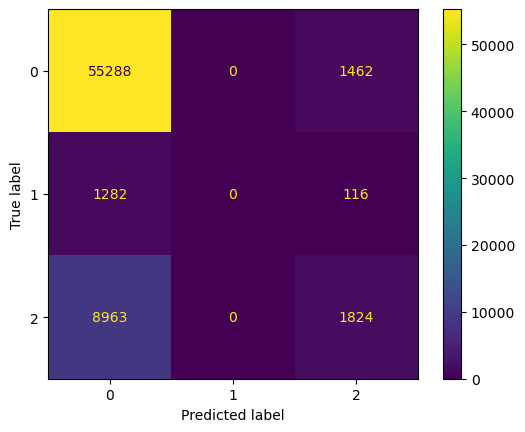

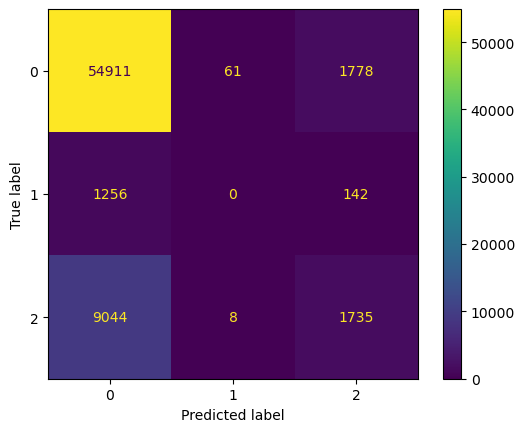

In [33]:
print("Confusion Matrix of Logistic Regression and Random Forest Tree")
ConfusionMatrixDisplay(cm1).plot()
ConfusionMatrixDisplay(cm).plot()